In [1]:
from PIL import Image
import os, glob, cv2, random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ramdom_seed = 5198

# tf.random.set_random_seed(ramdom_seed)
# torch.manual_seed(ramdom_seed)
# torch.cuda.manual_seed_all(ramdom_seed)
np.random.seed(ramdom_seed)
random.seed(ramdom_seed)
os.environ['PYTHONHASHSEED'] = str(ramdom_seed)

In [3]:
def data_generator(data_path, batch_size = 16, augment = True):
    
    imgs_list = sorted(glob.glob(data_path +'/raw_image/*.png'))
    labs_list = sorted(glob.glob(data_path +'/raw_mask/*.png'))

    idx = 0
    while 1:
        idx_list = list(range(len(imgs_list)))
        random.shuffle(idx_list)
        
        batch_imgs = []
        batch_labs = []
        
        if idx > len(idx_list) - batch_size:
            tmp_list = idx_list[idx:]
            idx = 0
        else:
            tmp_list = idx_list[idx:idx+batch_size]
            idx = idx + batch_size
            
        for i in tmp_list:
            img_tmp = cv2.imread(imgs_list[i])
            lab_tmp = cv2.imread(labs_list[i])
            
            img = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB)
            lab = cv2.cvtColor(lab_tmp, cv2.COLOR_BGR2GRAY)
                
            if augment == True:    
                img = augment_func(img)
                
            batch_imgs.append(img)
            batch_labs.append(lab)
            
        yield np.array(batch_imgs)/255., np.array(batch_labs)/255.

In [4]:
path = 'C:/Users/HW-Steve/Desktop/data/Segmentation/DATA1/'

In [5]:
train_generator = data_generator(path, 32, augment= False)

In [6]:
img, lab = next(train_generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

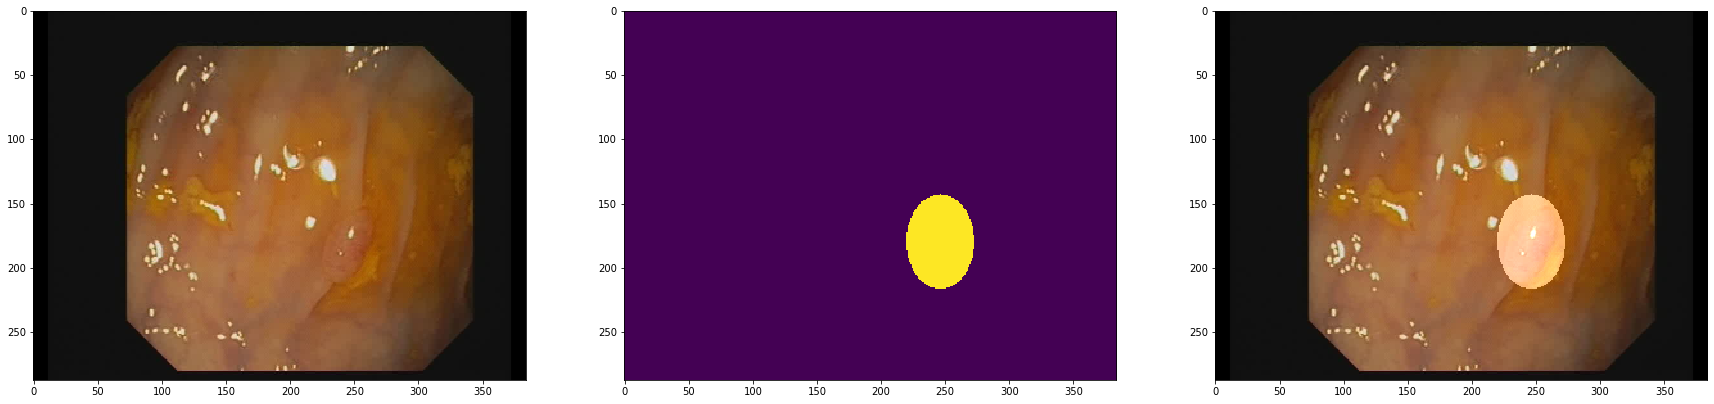

In [7]:
plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.imshow(img[0])
plt.subplot(132)
plt.imshow(lab[0])
plt.subplot(133)
plt.imshow(img[0] + np.tile(lab[0, ..., np.newaxis], (1,1,3)) * 0.4)
plt.show

In [1]:
a = 1

In [2]:
[1] + [1]*(3-1)

[1, 1, 1]

In [11]:
stride = 2
num_blocks = 3

In [12]:
strides = [stride] + [1]*(num_blocks-1)

In [13]:
strides

[2, 1, 1]